# Lesson 5: Coding and Financial Analysis

## Setup

In [1]:
from dotenv import load_dotenv, find_dotenv
from utils import get_openai_api_key
_ = load_dotenv(override=True)
OPENAI_API_KEY = get_openai_api_key()
llm_config = {"model": "gpt-4-turbo"}

## Define a code executor

In [2]:
from autogen.coding import LocalCommandLineCodeExecutor

/Users/ravikumartummalapenta/Documents/github/rktummalapenta/AI-Agents-in-LangGraph/.agents_env/lib/python3.11/site-packages/flaml/__init__.py:20: UserWarning: flaml.automl is not available. Please install flaml[automl] to enable AutoML functionalities.
  warnings.warn("flaml.automl is not available. Please install flaml[automl] to enable AutoML functionalities.")


In [3]:
executor = LocalCommandLineCodeExecutor(
    timeout=60,
    work_dir="coding",
)

## Create agents 

In [4]:
from autogen import ConversableAgent, AssistantAgent

### 1. Agent with code executor configuration

In [5]:
code_executor_agent = ConversableAgent(
    name="code_executor_agent",
    llm_config=False,
    code_execution_config={"executor": executor},
    human_input_mode="ALWAYS",
    default_auto_reply=
    "Please continue. If everything is done, reply 'TERMINATE'.",
)

### 2. Agent with code writing capability

In [6]:
code_writer_agent = AssistantAgent(
    name="code_writer_agent",
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

[autogen.oai.client: 01-18 17:10:03] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


In [7]:
code_writer_agent_system_message = code_writer_agent.system_message

In [8]:
print(code_writer_agent_system_message)

You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
    1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
    2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feed

## The task!

Ask the two agents to collaborate on a stock analysis task.

In [9]:
import datetime

today = datetime.datetime.now().date()
message = f"Today is {today}. "\
"Create a plot showing stock gain YTD for NVDA and TLSA. "\
"Make sure the code is in markdown code block and save the figure"\
" to a file ytd_stock_gains.png."""

<p style="background-color:#ECECEC; padding:15px; "> <b>Note:</b> In this lesson, you will use GPT 4 for better results. Please note that the lesson has a quota limit. If you want to explore the code in this lesson further, we recommend trying it locally with your own API key.

**Note**: You might see a different set of outputs than those shown in the video. The agents collaborate to generate the code needed for your task, and they might produce code with errors in the process. However, they will ultimately provide a correct code in the end.

In [14]:
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=message,
)

code_executor_agent (to code_writer_agent):

Today is 2025-01-18. Create a plot showing stock gain YTD for NVDA and TLSA. Make sure the code is in markdown code block and save the figure to a file ytd_stock_gains.png.

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

To create a plot showing the Year-To-Date (YTD) stock gain for companies, namely NVIDIA (NVDA) and Tesla (TSLA), you will need to follow these steps:

1. Use Python and libraries like `pandas` to retrieve and handle stock data.
2. Use `matplotlib` or any similar library for plotting.
3. Save the plot to a file.

First, I'll walk you through how to install the necessary Python libraries if you haven't already installed them:
- `pandas` for data manipulation,
- `matplotlib` for plotting graphs,
- `yfinance` for downloading Yahoo Finance stock data.

You can install these libraries using pip:
```shell
pip install pandas matplotlib yfinance
```

Now, 

Provide feedback to code_writer_agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation:  use december 2024 month data


code_executor_agent (to code_writer_agent):

use december 2024 month data

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

Based on your request to use stock data from December 2024 to now (January 18, 2025) to calculate Year-To-Date (YTD) gains for NVDA and TSLA, let's adjust the previous script. After installing the necessary packages as described earlier, save the following updated Python script to compute the gains using December 2024 data:

```python
# filename: plot_ytd_stock_gains.py

import yfinance as yf
import matplotlib.pyplot as plt

def fetch_and_plot_gains(stocks, start_date, end_date):
    plt.figure(figsize=(10, 6))

    for stock in stocks:
        # Fetch data from Yahoo Finance
        data = yf.download(stock, start=start_date, end=end_date)
        # Calculate gain from the beginning of the period
        initial_price = data['Adj Close'].iloc[0]
        gains = (data['Adj Close'] / initi

Provide feedback to code_writer_agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation:  



>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING CODE BLOCK (inferred language is python)...
code_executor_agent (to code_writer_agent):

exitcode: 1 (execution failed)
Code output: 
[*********************100%***********************]  1 of 1 completed
Traceback (most recent call last):
  File "/Users/ravikumartummalapenta/Documents/github/rktummalapenta/AI-Agents-in-LangGraph/.agents_env/lib/python3.11/site-packages/pandas/core/indexes/base.py", line 3805, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7081, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7089, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Adj Close'

The above

Provide feedback to code_writer_agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation:  use only december 2024vmonth data to load


code_executor_agent (to code_writer_agent):

use only december 2024vmonth data to load

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

To focus on stock data specifically for December 2024, we need to ensure that the code fetches and plots data starting from December 1, 2024, and ending on December 31, 2024. Here's an updated Python script to reflect this change:

```python
# filename: plot_ytd_stock_gains.py

import yfinance as yf
import matplotlib.pyplot as plt

def fetch_and_plot_gains(stocks, start_date, end_date):
    plt.figure(figsize=(10, 6))

    for stock in stocks:
        # Fetch data from Yahoo Finance
        data = yf.download(stock, start=start_date, end=end_date)
        # Calculate gain from the beginning of the period
        if 'Adj Close' in data.columns:
            price_column = 'Adj Close'
        else:
            price_column = 'Close'  # Fallback in case 'Adj Close' is not availab

Provide feedback to code_writer_agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation:  



>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING CODE BLOCK (inferred language is python)...
code_executor_agent (to code_writer_agent):

exitcode: 0 (execution succeeded)
Code output: 
[*********************100%***********************]  1 of 1 completed

[*********************100%***********************]  1 of 1 completed
Figure(1000x600)


--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

Great! The script executed successfully, and it has fetched the stock data for December 2024, calculated the gains for NVIDIA (NVDA) and Tesla (TSLA) over the month, and plotted the results. The output file `ytd_stock_gains.png` should now contain the plot showing the percentage gains for both stocks throughout December 2024.

You can check the folder where you ran the script for the `ytd_stock_gains.png` file to view the visual presentation of how the stocks performed during that month.



Provide feedback to code_writer_agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation:  terminate


code_executor_agent (to code_writer_agent):

terminate

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

TERMINATE

--------------------------------------------------------------------------------


Provide feedback to code_writer_agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation:  exit


## Let's see the plot!

**Note**: 
* Your plot might differ from the one shown in the video because the LLM's freestyle code generation could choose a different plot type, such as a bar plot. 
* You can re-run the previous cell and check the generated code. If it produces a bar plot, remember you can directly specify your preference by asking for a specific plot type instead of a bar plot.

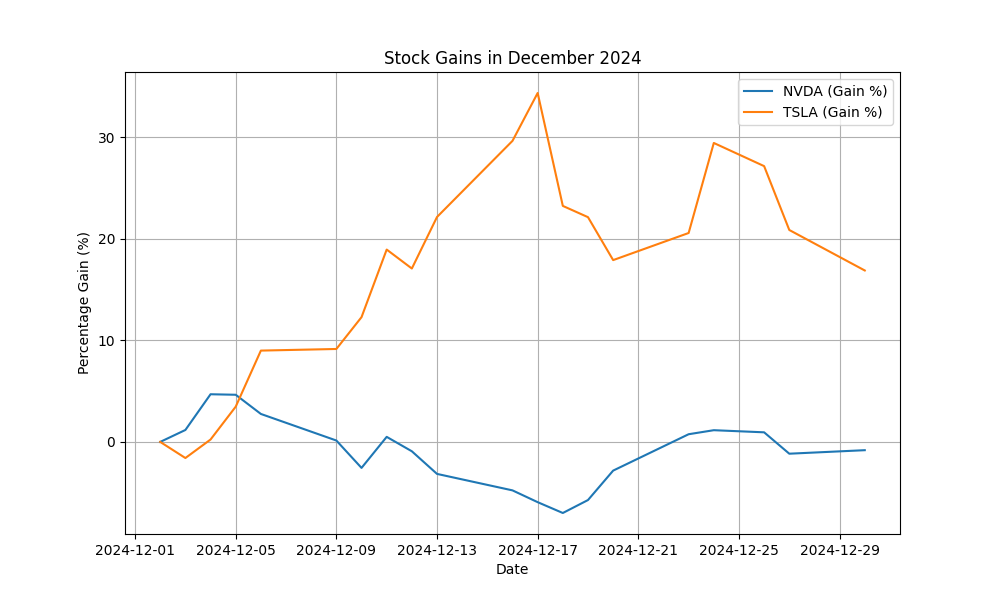

In [15]:
import os
from IPython.display import Image


Image(os.path.join("coding", "ytd_stock_gains.png"))

**Note**: The agent will automatically save the code in a .py file and the plot in a .png file. To access and check the files generated by the agents, go to the `File` menu and select `Open....` Then, open the folder named `coding` to find all the generated files.

## User-Defined Functions

Instead of asking LLM to generate the code for downloading stock data 
and plotting charts each time, you can define functions for these two tasks and have LLM call these functions in the code.

In [16]:
def get_stock_prices(stock_symbols, start_date, end_date):
    """Get the stock prices for the given stock symbols between
    the start and end dates.

    Args:
        stock_symbols (str or list): The stock symbols to get the
        prices for.
        start_date (str): The start date in the format 
        'YYYY-MM-DD'.
        end_date (str): The end date in the format 'YYYY-MM-DD'.
    
    Returns:
        pandas.DataFrame: The stock prices for the given stock
        symbols indexed by date, with one column per stock 
        symbol.
    """
    import yfinance

    stock_data = yfinance.download(
        stock_symbols, start=start_date, end=end_date
    )
    return stock_data.get("Close")

In [17]:
def plot_stock_prices(stock_prices, filename):
    """Plot the stock prices for the given stock symbols.

    Args:
        stock_prices (pandas.DataFrame): The stock prices for the 
        given stock symbols.
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))
    for column in stock_prices.columns:
        plt.plot(
            stock_prices.index, stock_prices[column], label=column
                )
    plt.title("Stock Prices")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)
    plt.savefig(filename)

### Create a new executor with the user-defined functions

In [18]:
executor = LocalCommandLineCodeExecutor(
    timeout=60,
    work_dir="coding",
    functions=[get_stock_prices, plot_stock_prices],
)

In [19]:
code_writer_agent_system_message += executor.format_functions_for_prompt()
print(code_writer_agent_system_message)

You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
    1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
    2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feed

### Let's update the agents with the new system message

In [20]:
code_writer_agent = ConversableAgent(
    name="code_writer_agent",
    system_message=code_writer_agent_system_message,
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

[autogen.oai.client: 01-18 17:39:38] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


In [21]:
code_executor_agent = ConversableAgent(
    name="code_executor_agent",
    llm_config=False,
    code_execution_config={"executor": executor},
    human_input_mode="ALWAYS",
    default_auto_reply=
    "Please continue. If everything is done, reply 'TERMINATE'.",
)

### Start the same task again!

In [22]:
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=f"Today is {today}."
    "Download the stock prices YTD for NVDA and TSLA and create"
    "a plot. Make sure the code is in markdown code block and "
    "save the figure to a file stock_prices_YTD_plot.png.",
)

code_executor_agent (to code_writer_agent):

Today is 2025-01-18.Download the stock prices YTD for NVDA and TSLA and createa plot. Make sure the code is in markdown code block and save the figure to a file stock_prices_YTD_plot.png.

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

Let's break down this task into a few steps:

1. Import necessary functions and modules.
2. Define the stock symbols and YTD (Year-To-Date) dates.
3. Download stock prices for NVDA and TSLA from the beginning of the year to today.
4. Plot the stock prices.
5. Save the plot to a file named "stock_prices_YTD_plot.png".

Here is the complete Python script to achieve this:

```python
# filename: download_and_plot_stocks.py
from functions import get_stock_prices, plot_stock_prices
import pandas as pd

# Define stock symbols and date range for YTD
symbols = ['NVDA', 'TSLA']
start_date = '2025-01-01'
end_date = '2025-01-18'  # Today's date

Provide feedback to code_writer_agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation:  use only december 2024 month data only


code_executor_agent (to code_writer_agent):

use only december 2024 month data only

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

Let's update the previous script to consider only December 2024 data for the stocks NVDA and TSLA and save the plot accordingly. Here's the updated Python script:

```python
# filename: download_and_plot_stocks_december.py
from functions import get_stock_prices, plot_stock_prices
import pandas as pd

# Define stock symbols and date range for December 2024
symbols = ['NVDA', 'TSLA']
start_date = '2024-12-01'
end_date = '2024-12-31'

# Get the stock prices for December 2024
stock_prices = get_stock_prices(symbols, start_date, end_date)

# Plot and save the stock prices to file
plot_stock_prices(stock_prices, 'stock_prices_December_2024_plot.png')
```

Please save this code into a Python script file named `download_and_plot_stocks_december.py` and execute it. This script will now f

Provide feedback to code_writer_agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation:  



>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING CODE BLOCK (inferred language is python)...
code_executor_agent (to code_writer_agent):

exitcode: 0 (execution succeeded)
Code output: 
[                       0%                       ]
[*********************100%***********************]  2 of 2 completed


--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

The script has executed successfully and the stock prices for NVDA and TSLA for December 2024 have been retrieved, plotted, and saved to the file "stock_prices_December_2024_plot.png".

If you need any further assistance or another task, feel free to ask. Otherwise, everything appears to be completed successfully.

TERMINATE

--------------------------------------------------------------------------------


Provide feedback to code_writer_agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation:  exit


### Plot the results

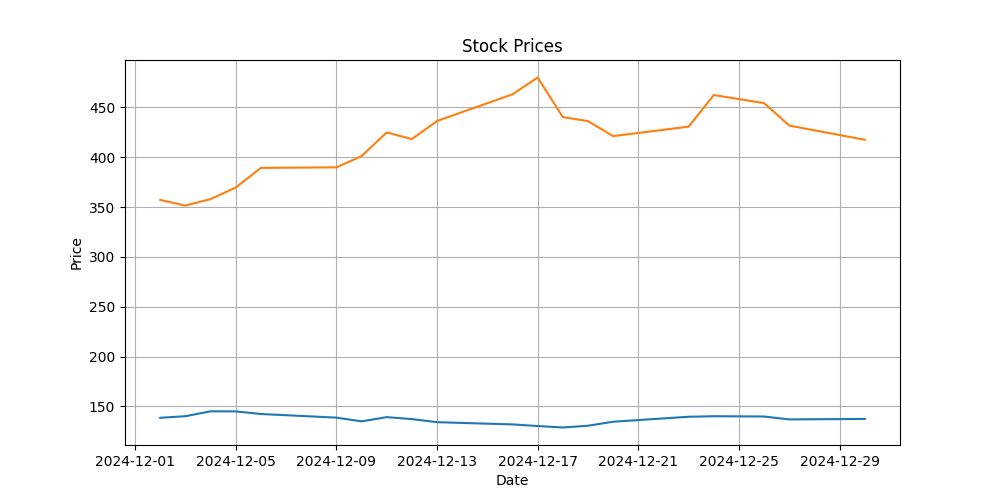

In [24]:
Image(os.path.join("coding", "stock_prices_December_2024_plot.png"))

**Note**: The agent will automatically save the code in a .py file and the plot in a .png file. To access and check the files generated by the agents, go to the `File` menu and select `Open....` Then, open the folder named `coding` to find all the generated files.